# Education Dropout

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

### Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/DataSets/PredictStudent/dataset.csv')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

The dataset consists of 4424 rows and columns.

In [ ]:
# Renaming columns
ds.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)
# Encoding target column
ds['Target'] = ds['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    # Add other mappings if necessary
})
"""ds.Target = ds.Target.map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})"""

"ds.Target = ds.Target.map({\n    'Dropout':0,\n    'Enrolled':1,\n    'Graduate':2\n})"

### EDA

Null Value Analysis

In [ ]:
pd.DataFrame({'Total Null':ds.isnull().sum(),'Percent':ds.isnull().sum()/len(ds)*100})


,Total Null,Percent
Marital status,0,0.000000
Application mode,0,0.000000
Application order,0,0.000000
Course,0,0.000000
Daytime/evening attendance,0,0.000000
Previous qualification,0,0.000000
Nationality,0,0.000000
Mother's qualification,0,0.000000
Father's qualification,0,0.000000
Mother's occupation,0,0.000000


In [ ]:
ds = ds.dropna()

In [ ]:
ds.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age                                               0
International                                     0
Curricular u

The dataset has no null values.

In [ ]:
for column in ds.columns:
    print(column)
    print(ds[column].unique())

Marital status
[1 2 4 3 5 6]
Application mode
[ 8  1  9 15 12 14  4 13  6 17 16  7  3  2  5 10 11]
Application order
[5 4 1 2 3 6 9]
Course
[ 2  5 11 10 16 15 13  6 12  4  9  1  7  8 17  3 14]
Daytime/evening attendance
[1 0]
Previous qualification
[ 1 14  8  3 15 12  2  4 16 17  7  6  9  5 11 13 10]
Nationality
[ 1  3 14 12 18  8  9 13 16 10 21 17 20 15 19 11  7]
Mother's qualification
[13 22  1  3  4 23 19 10  5  2 18  7 24 25 11 20  6  9 26  8 27 28 21 12
 17 16 29]
Father's qualification
[10 27 14 28  3  5  1  4 24  2  9 29 26 18 15 25 31 16 11 20 12  7 13  8
  6 30 21 17 34 23 19 22]
Mother's occupation
[ 6 10  5  8  4  2  1  7  3 12 28  9 13 29 23 32 30 18 24 19 11 15 21 27
 14 20 22 17 31]
Father's occupation
[10  8  4  9 11  3  7  1  6  5  2 12 19 13 39 34 44 24 35 26 36 43 16 31
 42 20 37 29 25 21 40 17 15 41 45]
Displaced
[1 0]
Educational special needs
[0 1]
Debtor
[0 1]
Tuition fees up to date
[1 0]
Gender
[1 0]
Scholarship holder
[0 1]
Age
[20 19 22 18 21 37 43 55 29 24 27

In [ ]:
ds.Target.value_counts(normalize=True)

0.0    0.641535
1.0    0.358465
Name: Target, dtype: float64

<Axes: >

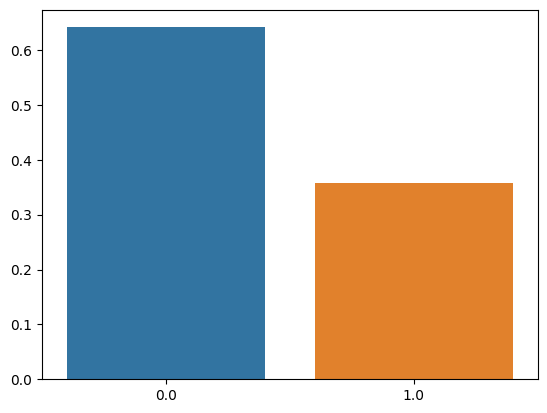

In [ ]:
sns.barplot(x=ds.Target.value_counts(normalize=True).index, y=ds.Target.value_counts(normalize=True).values)

50% of the data is marked as graduate, while only 18% is listed as still enrolled. We will have to treat the data accordingly.

### Correlation Heatmap

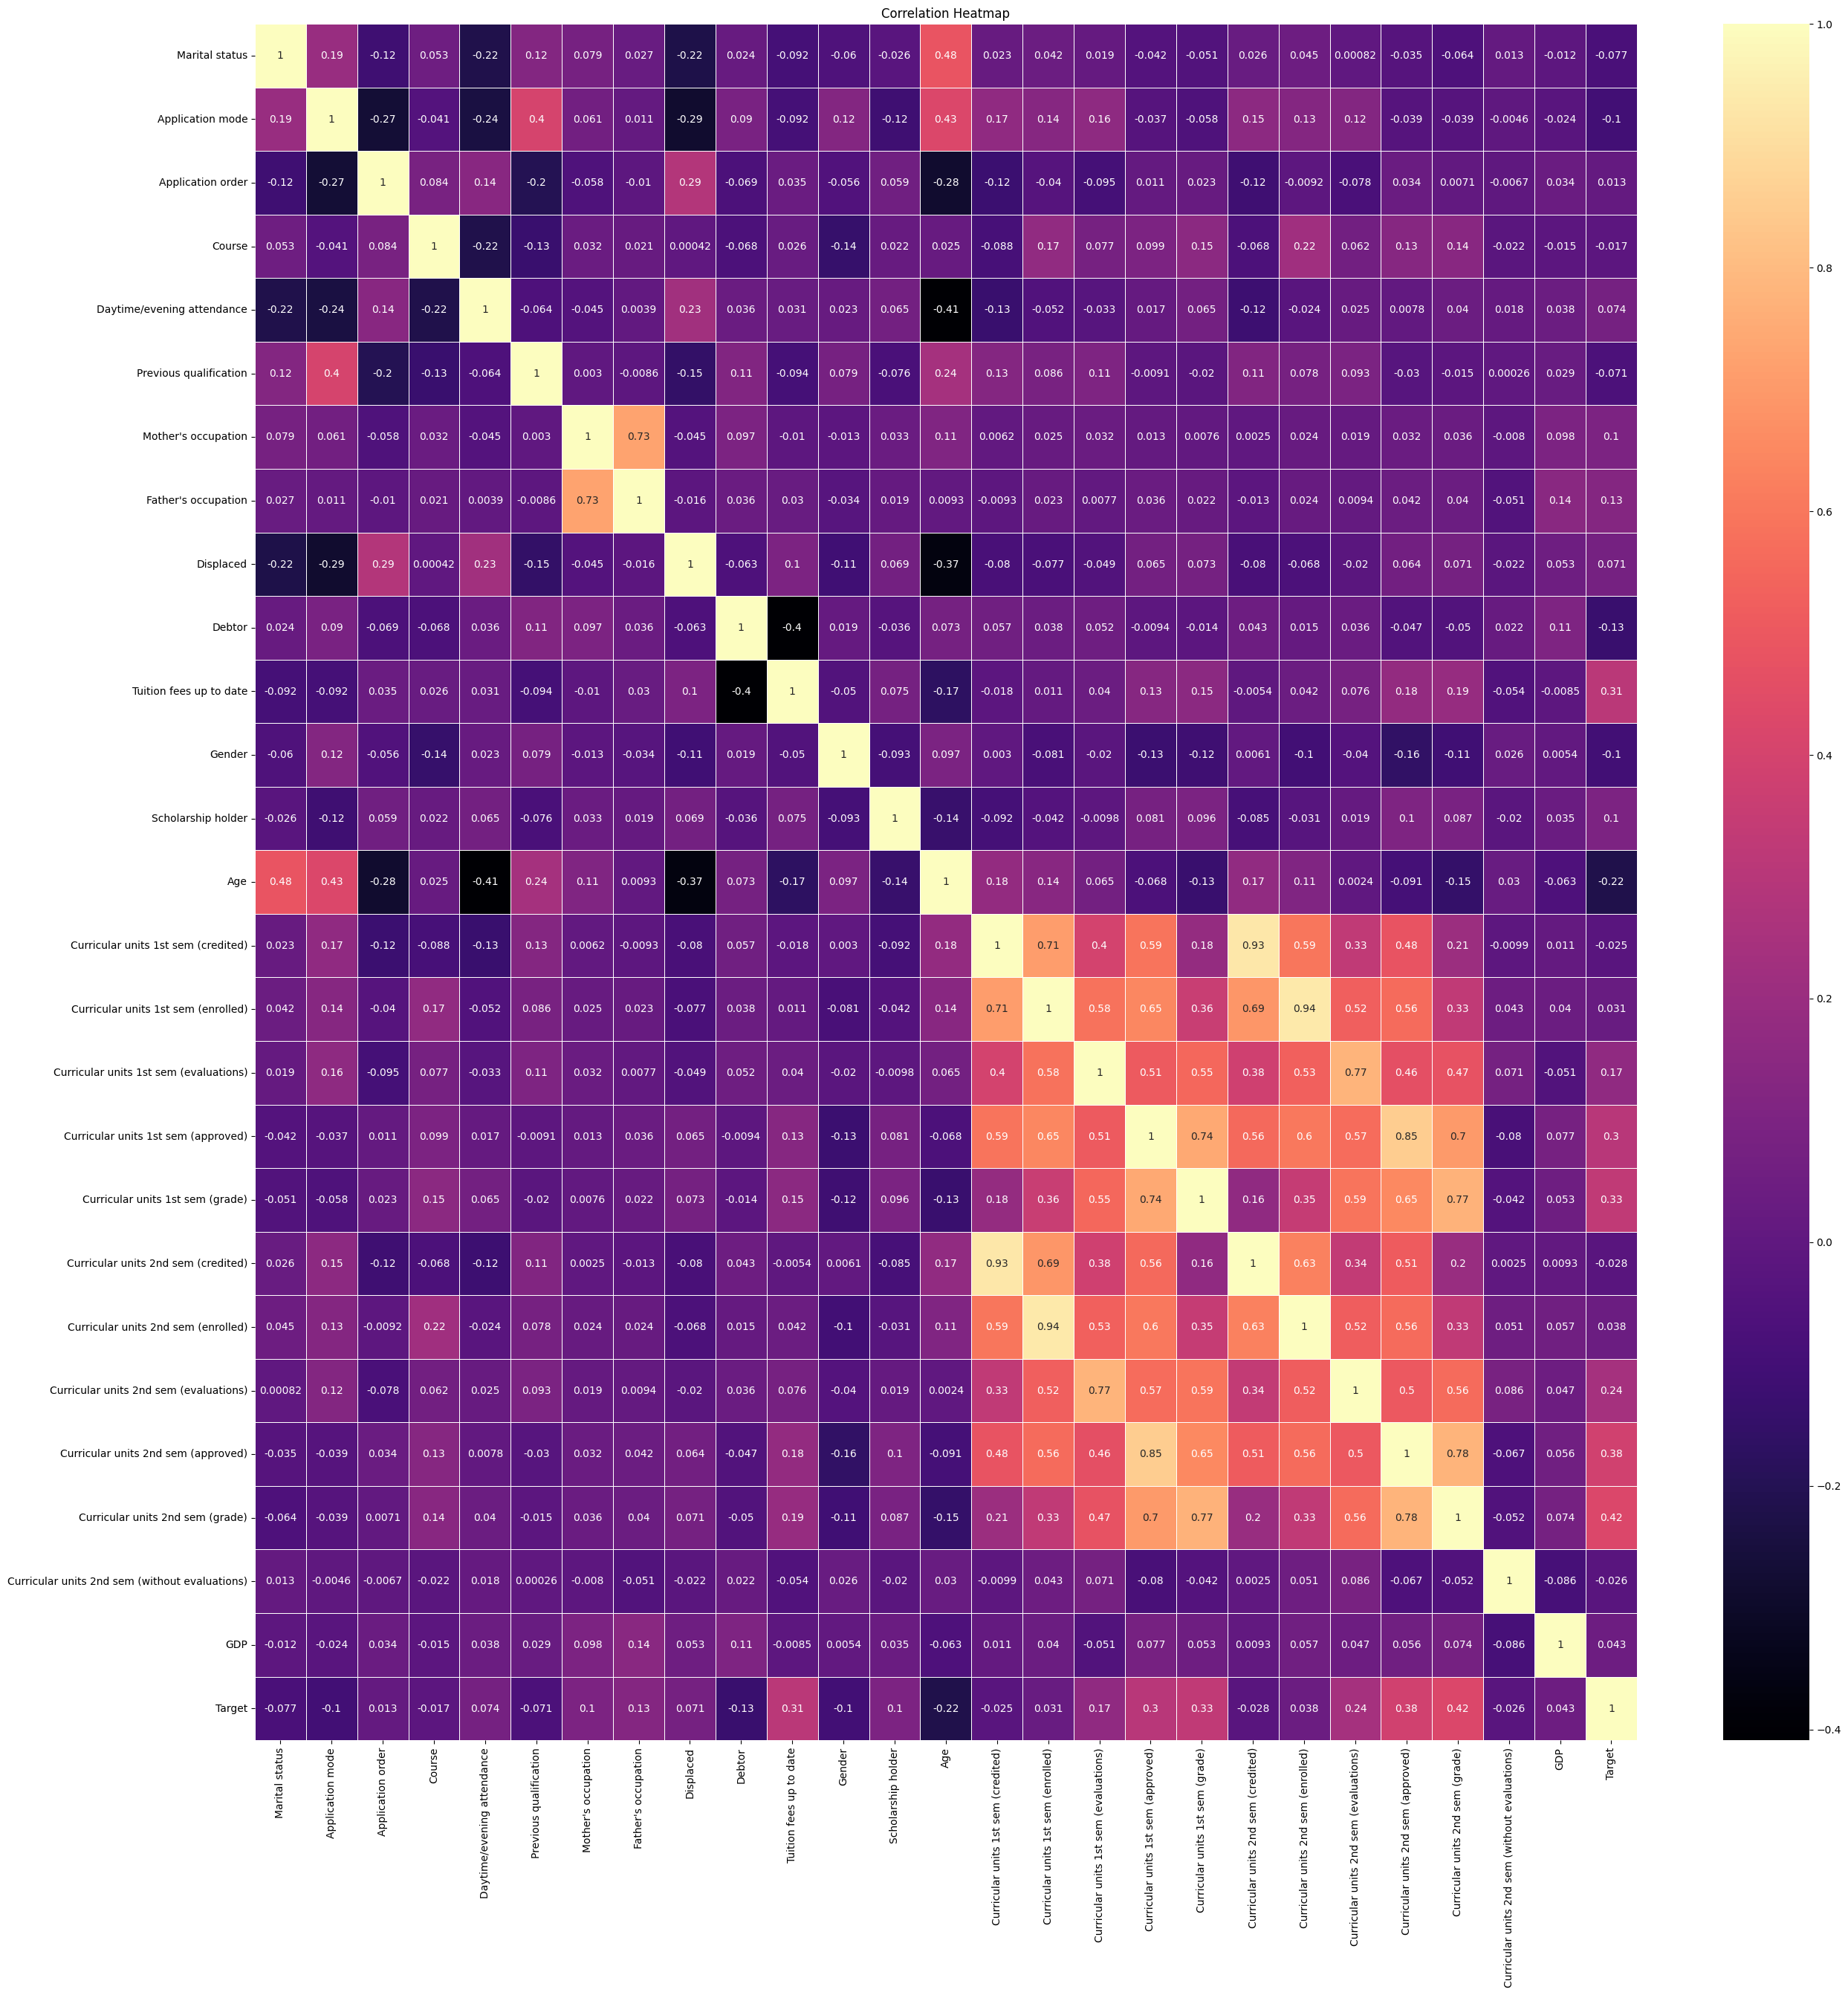

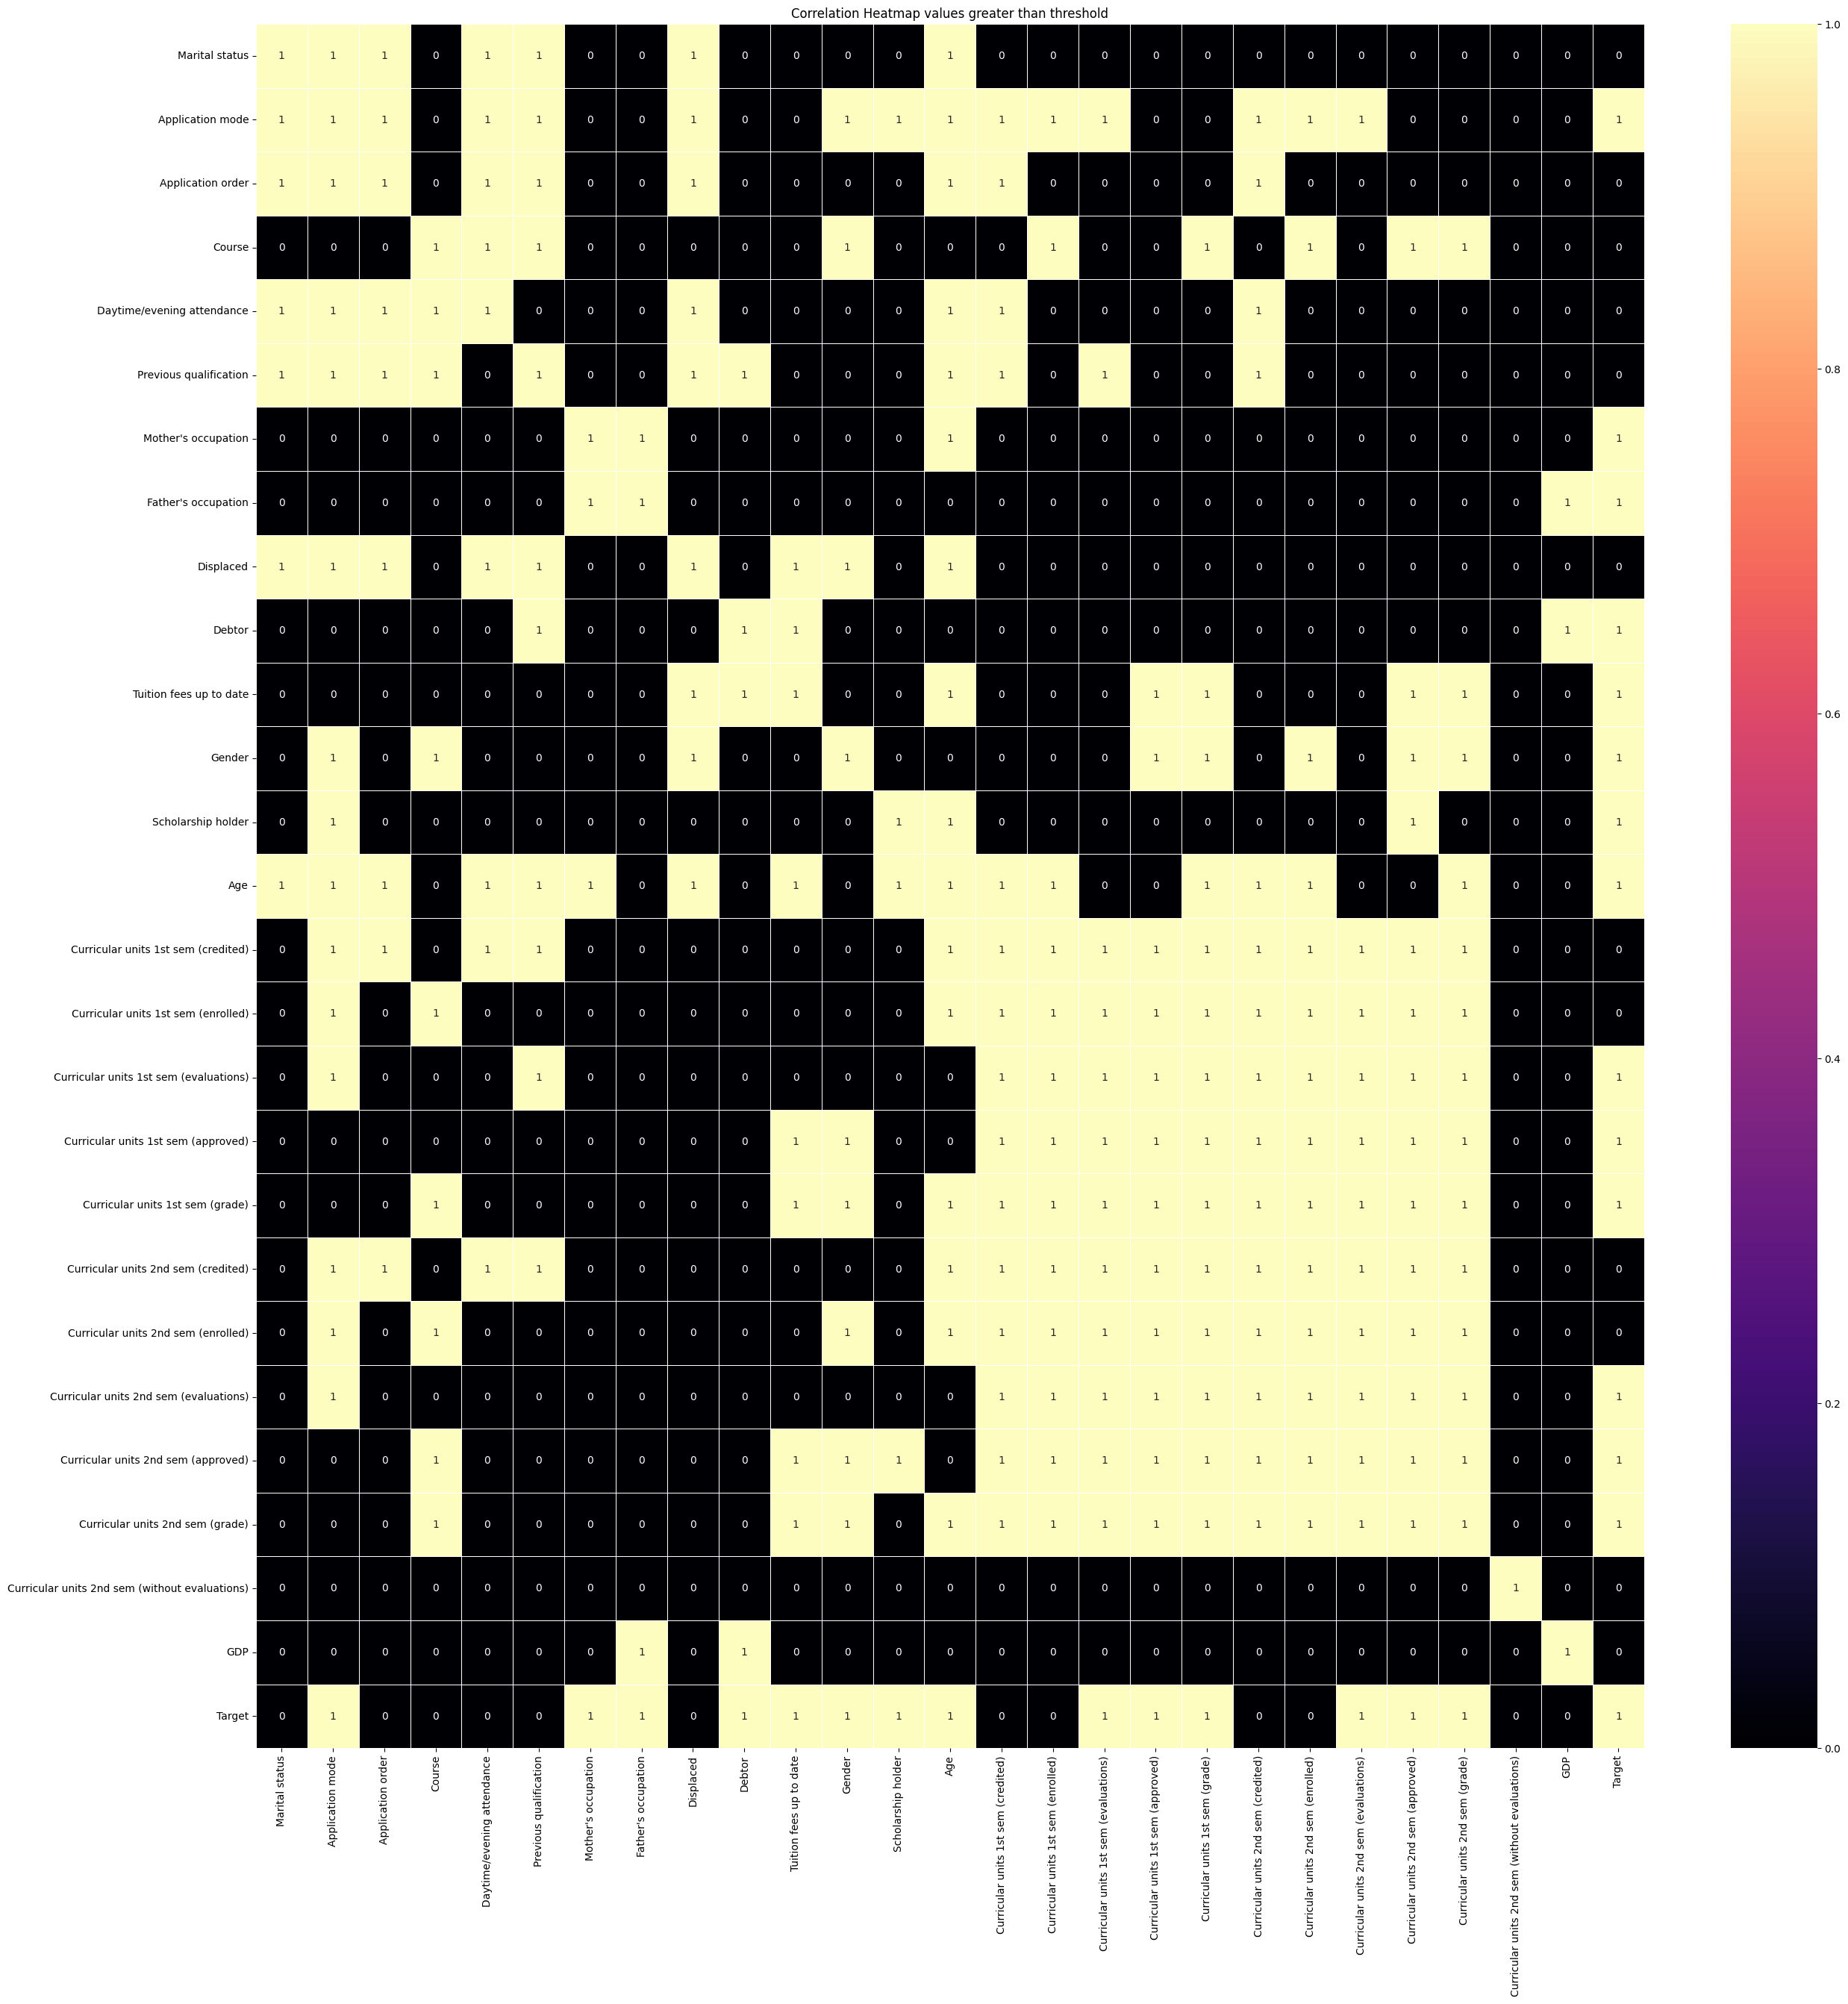

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(ds.corr() , annot=True,cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(30, 30))
sns.heatmap(abs(ds.corr())>0.1 , annot=True,cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap values greater than threshold')
plt.show()

Top 10 highly correlated features.

In [ ]:
ds.corr()['Target'].sort_values(ascending=False)[1:10]

Curricular units 2nd sem (grade)          0.423535
Curricular units 2nd sem (approved)       0.384410
Curricular units 1st sem (grade)          0.330043
Tuition fees up to date                   0.308446
Curricular units 1st sem (approved)       0.302821
Curricular units 2nd sem (evaluations)    0.238943
Curricular units 1st sem (evaluations)    0.168771
Father's occupation                       0.128112
Mother's occupation                       0.102850
Name: Target, dtype: float64

We can remove the features whose absolute correlation value is close to 0.

In [ ]:
ds.drop(columns=['Nationality', 'Mother\'s qualification',
                                  'Father\'s qualification',
                                  'Educational special needs',
                                  'International',
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate',
                                  'Inflation rate'], axis=1,inplace=True)

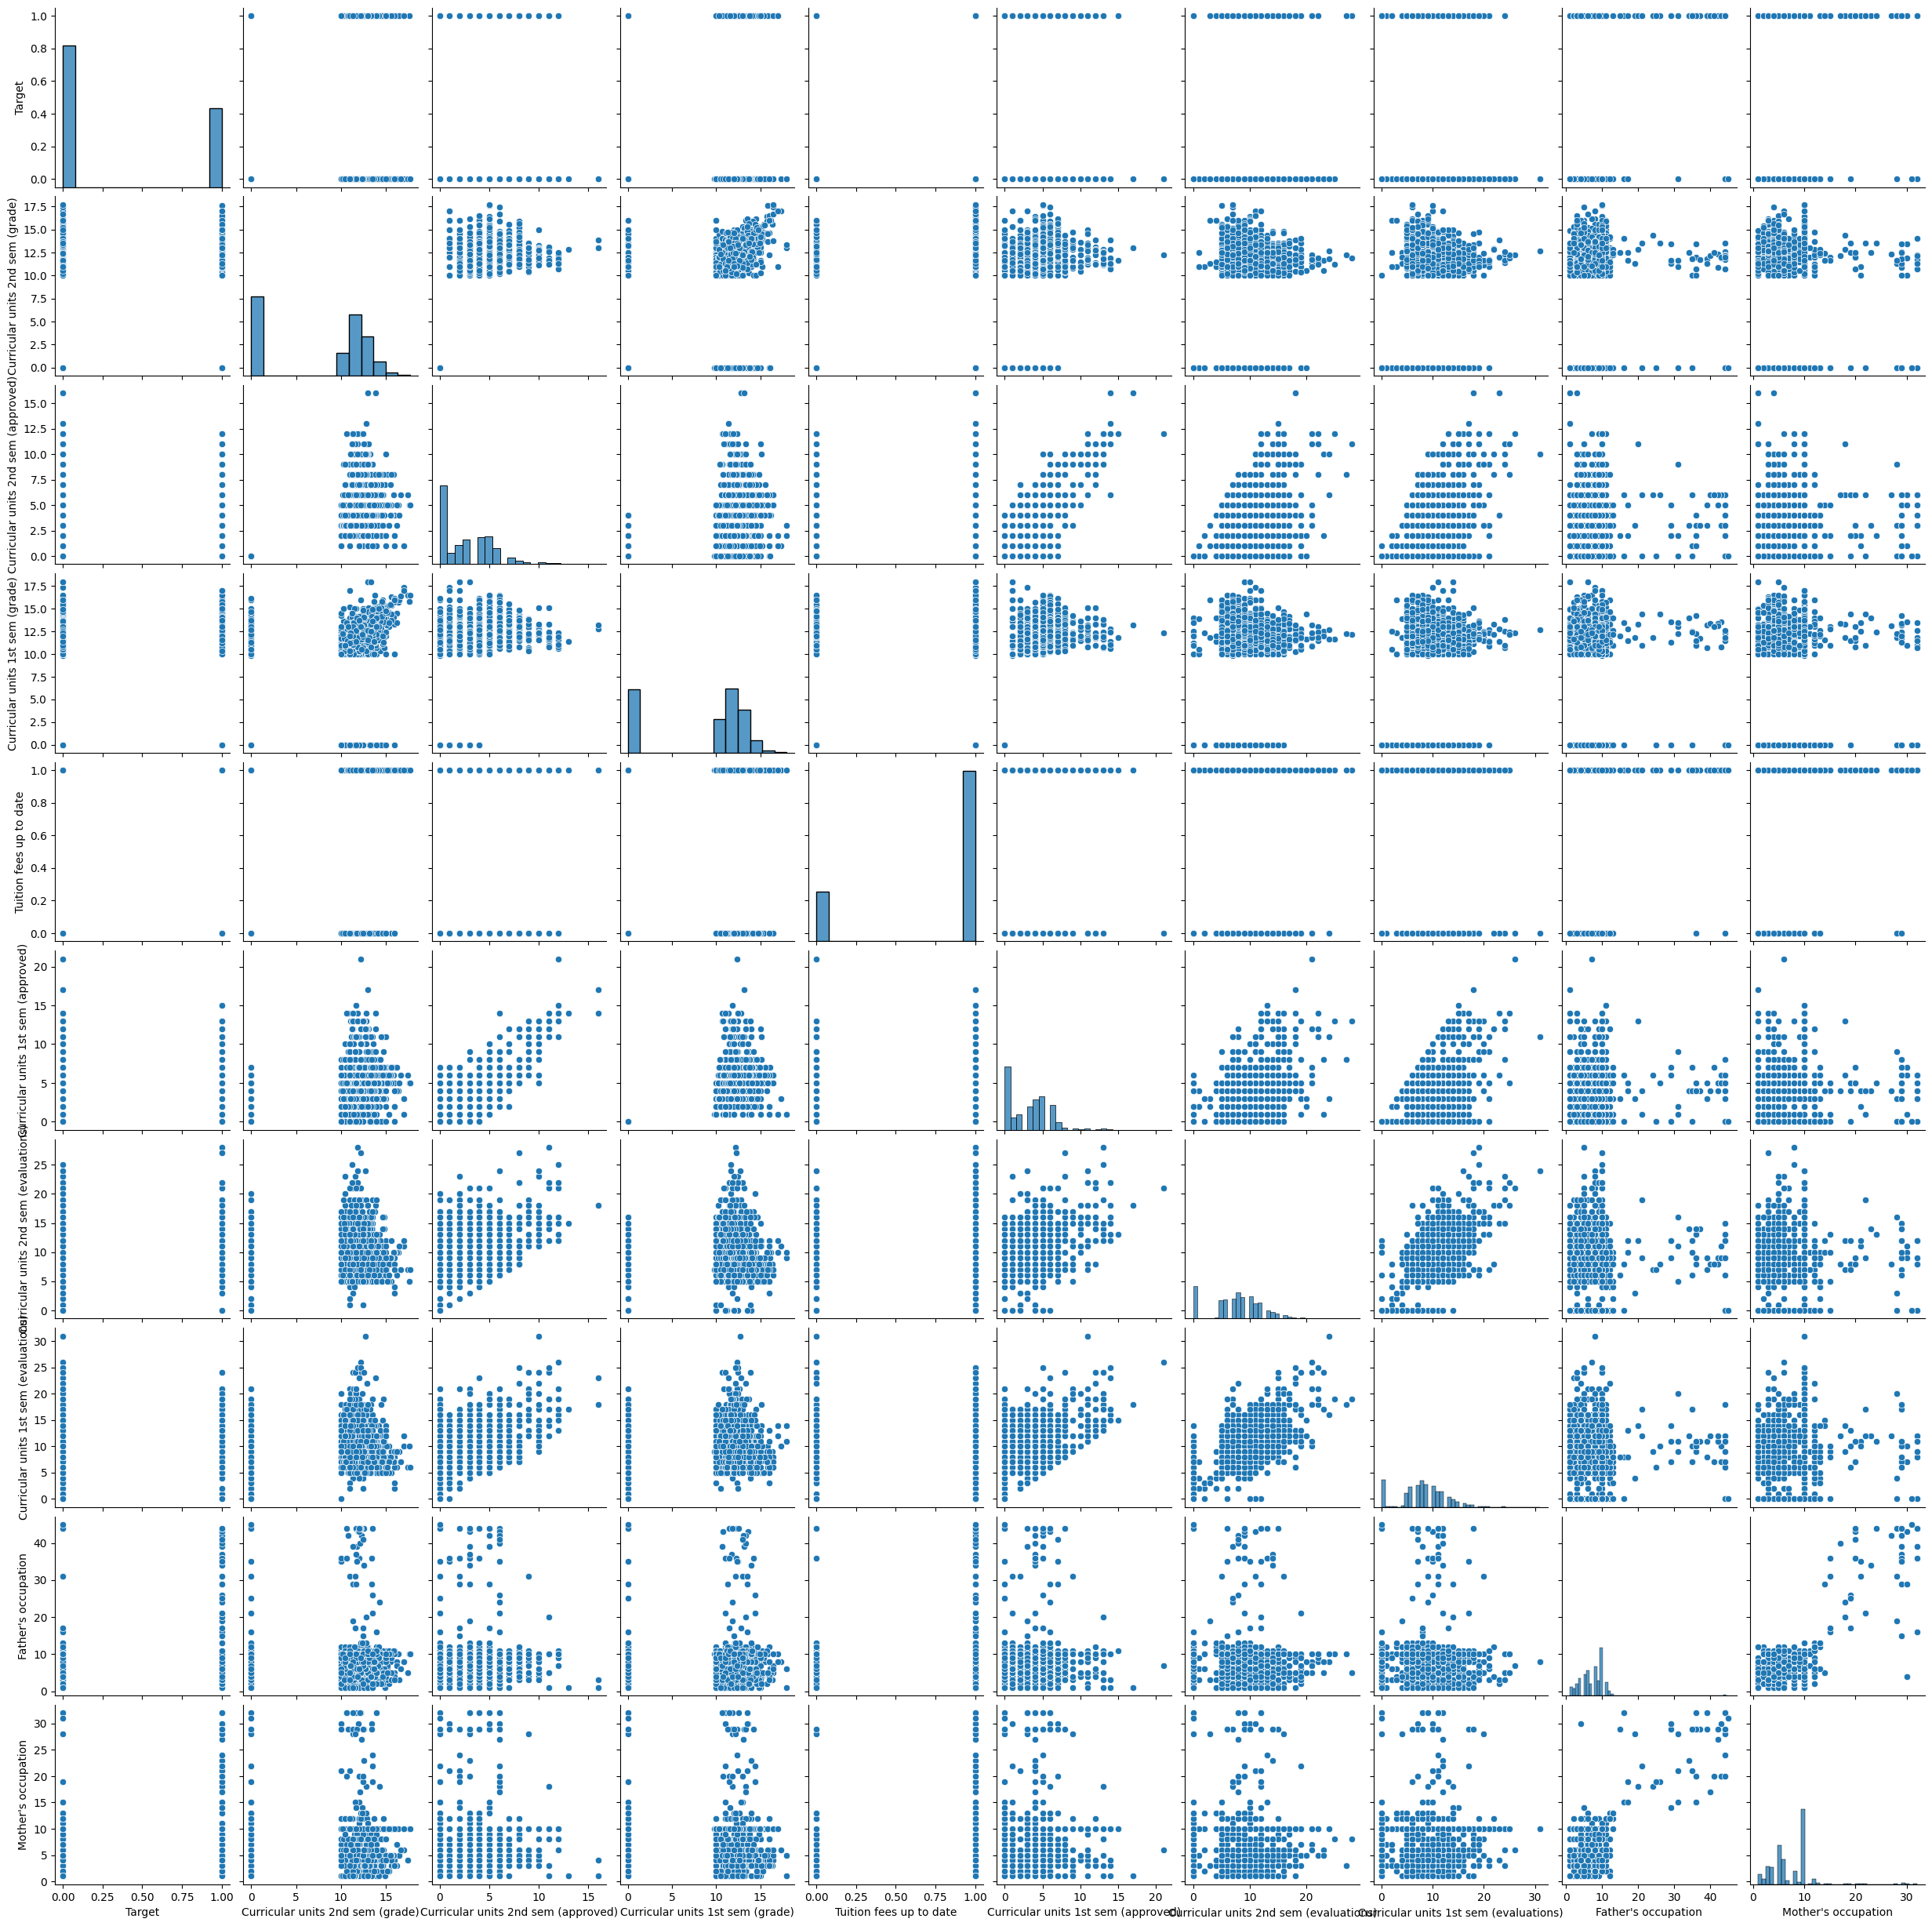

In [ ]:
sns.pairplot(ds, vars = ds.corr()['Target'].sort_values(ascending=False)[0:10].index)
plt.show()

This is inter-correlation plot between the top 10 features based on correlation.

### Data Pre-Processing

In [ ]:
X = ds.drop('Target', axis=1)
y = ds['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Modelling

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=0)
random_forest_model = RandomForestClassifier(random_state=2)
logistic_regression_model = LogisticRegression(random_state=42)
k_nearest_neighbour_model = KNeighborsClassifier(n_neighbors=3)
ADA_boost_model = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
#GradientBoost_model = XGBClassifier(tree_method='gpu_hist')
support_vector_model = svm.SVC(kernel='linear',probability=True)

In [ ]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
k_nearest_neighbour_model.fit(X_train, y_train)
ADA_boost_model.fit(X_train, y_train)
#GradientBoost_model.fit(X_train, y_train)
support_vector_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear', probability=True)

In [ ]:
model_list = [decision_tree_model, random_forest_model,logistic_regression_model,
k_nearest_neighbour_model,
ADA_boost_model,
#GradientBoost_model,
support_vector_model ]
for model in model_list:
    y_pred = model.predict(X_test)
    print("Accuracy of model {} :".format(str(model).split('(')[0]),round(accuracy_score(y_test,y_pred)*100,2),"%")
    print("Weighted F1 of model {} :".format(str(model).split('(')[0]),round(f1_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("Precision Score of model {} :".format(str(model).split('(')[0]),round(precision_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("Recall Score of model {} :".format(str(model).split('(')[0]),round(recall_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("\n")

Accuracy of model DecisionTreeClassifier : 72.46 %
Weighted F1 of model DecisionTreeClassifier : 72.58 %
Precision Score of model DecisionTreeClassifier : 72.75 %
Recall Score of model DecisionTreeClassifier : 72.46 %


Accuracy of model RandomForestClassifier : 77.43 %
Weighted F1 of model RandomForestClassifier : 77.37 %
Precision Score of model RandomForestClassifier : 77.33 %
Recall Score of model RandomForestClassifier : 77.43 %


Accuracy of model LogisticRegression : 76.75 %
Weighted F1 of model LogisticRegression : 76.79 %
Precision Score of model LogisticRegression : 76.84 %
Recall Score of model LogisticRegression : 76.75 %


Accuracy of model KNeighborsClassifier : 65.01 %
Weighted F1 of model KNeighborsClassifier : 65.25 %
Precision Score of model KNeighborsClassifier : 65.6 %
Recall Score of model KNeighborsClassifier : 65.01 %


Accuracy of model AdaBoostClassifier : 75.85 %
Weighted F1 of model AdaBoostClassifier : 75.94 %
Precision Score of model AdaBoostClassifier : 76

### Using Ensemble techniques to boost accuracy

In [ ]:
ensemble_model = VotingClassifier(estimators=[('rfc', random_forest_model), ('lr', logistic_regression_model), ('abc',ADA_boost_model), ], voting='soft')
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("Weighted F1 of model {} :".format(str(model).split('(')[0]),round(f1_score(y_test,y_pred,average='weighted')*100,2),"%")
print("Precision Score of model {} :".format(str(model).split('(')[0]),round(precision_score(y_test,y_pred,average='weighted')*100,2),"%")
print("Recall Score of model {} :".format(str(model).split('(')[0]),round(recall_score(y_test,y_pred,average='weighted')*100,2),"%")
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 77.2 %
Weighted F1 of model SVC : 77.27 %
Precision Score of model SVC : 77.35 %
Recall Score of model SVC : 77.2 %


